<!DOCTYPE html>
<html>
<body>

<h1>ML Project No:3</h1>

<h3 > Students: </h3>

<pre style="font-size:17px;">
   Nohelia Merino &nbsp;&nbsp;&nbsp; 610117

   Arley Wilches &nbsp;&nbsp;&nbsp;&nbsp; 610110

   Kiran Luitel &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 610187
   
   Jasser Dhaouadi &nbsp;&nbsp; 610099
</pre>

<h3>References:</h3>
<p>https://www.coursera.org/learn/nlp-sequence-models </p>
<p>https://adventuresinmachinelearning.com/keras-lstm-tutorial/</p>
<p>https://github.com/tommytracey/AIND-Capstone/blob/master/machine_translation.ipynb</p>
<p>https://elitedatascience.com/keras-tutorial-deep-learning-in-python</p>

</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h1>Exploratory Data Analysis (EDA)</h1>



</body>
</html>

### Requirements:
- **keras 2.2.2** 
- **tensorflow 1.13.1** 

<!DOCTYPE html>
<html>
<body>

<h3>Import Libraries</h3>



</body>
</html>

In [1]:
# Import Packages
import collections
import numpy as np
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


<!DOCTYPE html>
<html>
<body>

<h3>Acquire Data</h3>



</body>
</html>

In [2]:
# Function to load the data

def load_data(path):
    """
    Load dataset
    """
    input_file = os.path.join(path)
    with open(input_file, "r",encoding='utf-8') as f:
        data = f.read()

    return data.split('\n')

In [3]:
# Load English data
english_sentences = load_data('small_vocab_en.txt')
# Load French data
french_sentences = load_data('small_vocab_fr.txt')

print('Dataset Loaded')

Dataset Loaded


<!DOCTYPE html>
<html>
<body>

<h3>Let's take a look at our dataset</h3>



</body>
</html>

In [4]:
for sample_i in range(5):
    print('English sample {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('French sample {}:  {}\n'.format(sample_i + 1, french_sentences[sample_i]))

English sample 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
French sample 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .

English sample 2:  the united states is usually chilly during july , and it is usually freezing in november .
French sample 2:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .

English sample 3:  california is usually quiet during march , and it is usually hot in june .
French sample 3:  california est généralement calme en mars , et il est généralement chaud en juin .

English sample 4:  the united states is sometimes mild during june , and it is cold in september .
French sample 4:  les états-unis est parfois légère en juin , et il fait froid en septembre .

English sample 5:  your least liked fruit is the grape , but my least liked is the apple .
French sample 5:  votre moins aimé fruit est le raisin , mais mon moins aimé est la pomme .



<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- Each line in english_sentences represents an English sentence</p>
<p>- Each line in french_sentences represents a French sentence</p>
<p>- a line of index=k in french_sentences is the correct translation of the line of index=k in english_sentences</p>




</body>
</html>

<!DOCTYPE html>
<html>
<body>


<h4>Remark</h4>
<p>- All text is in lowercase</p>
<p>- The puncuations have been delimited using spaces</p>




</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>Analysis</h3>



</body>
</html>

In [5]:
english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentences for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentences for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


<BarContainer object of 2 artists>

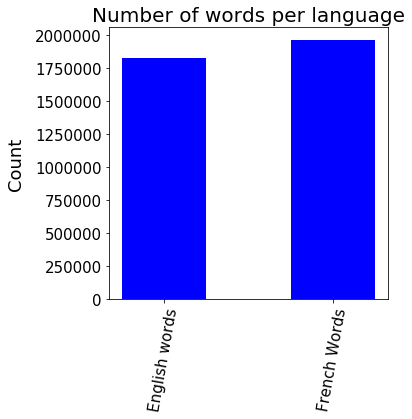

In [6]:
x =['English words','French Words']
y = [1823250, 1961295 ]

fig = plt.figure(1, figsize=(5,5))     
plt.ylabel("Count", fontsize = 18, labelpad = 10)
plt.xticks(rotation=80, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Number of words per language",fontsize = 20)
plt.bar(x,y, 0.5, color='b')

<BarContainer object of 2 artists>

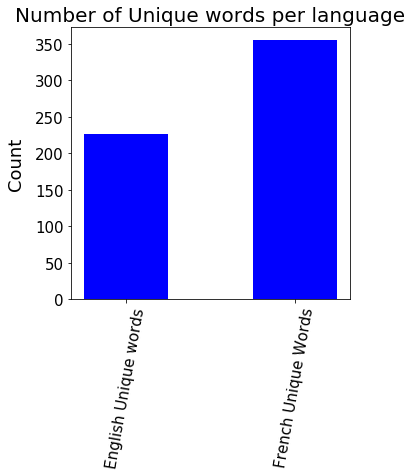

In [7]:
x =['English Unique words','French Unique Words']
y = [227 , 355 ]

fig = plt.figure(1, figsize=(5,5))     
plt.ylabel("Count", fontsize = 18, labelpad = 10)
plt.xticks(rotation=80, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Number of Unique words per language",fontsize = 20)
plt.bar(x,y, 0.5, color='b')

<!DOCTYPE html>
<html>
<body>


<h4>Observation</h4>
<p>- The number of French words is greater than the number of English words: French language uses more words than English language to express meanings and phrases. </p>
<p>- The most common words in each language are almost the translation of each other</p>




</body>
</html>

<!DOCTYPE html>
<html>
<body>


<h3>English Words</h3>





</body>
</html>

<BarContainer object of 20 artists>

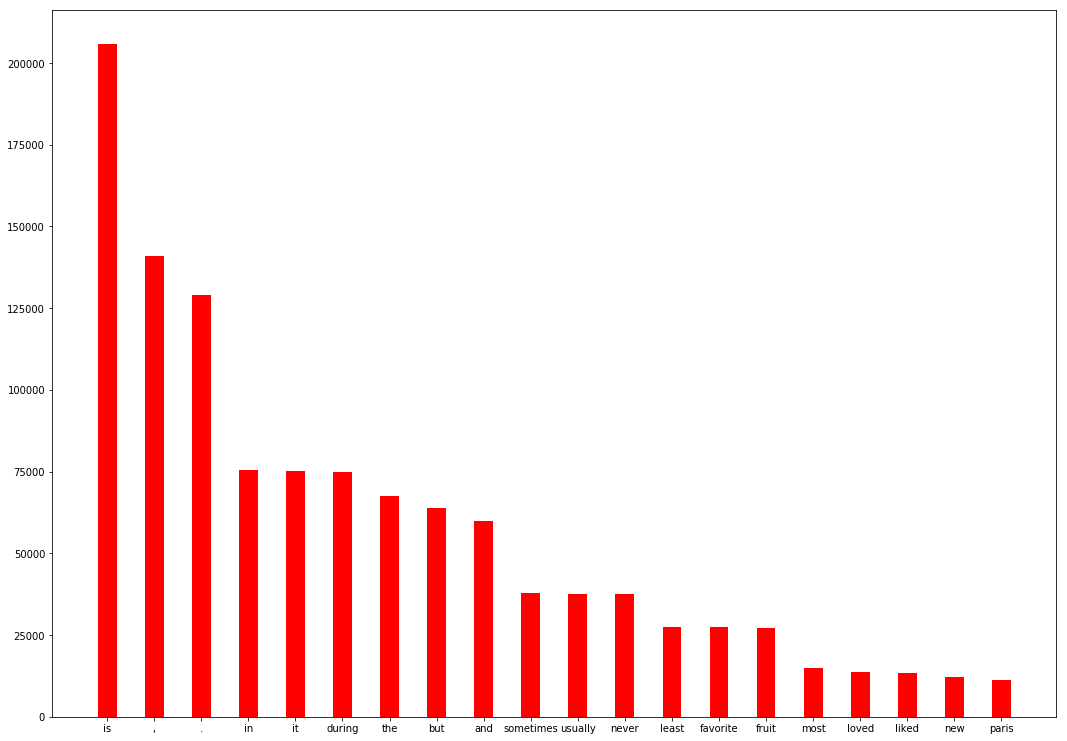

In [8]:
fig = plt.figure(1, figsize=(18,13))  
plt.bar(*zip(*english_words_counter.most_common(20)), width=0.4, color='r')

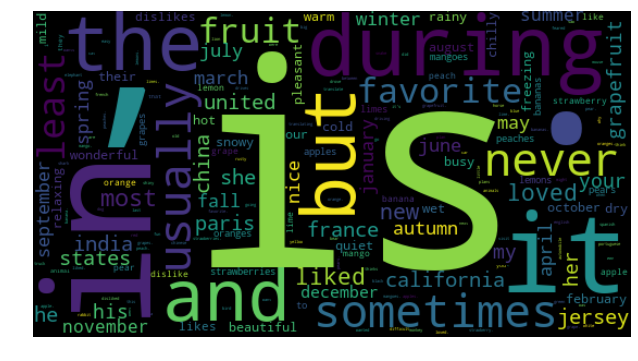

In [9]:
from wordcloud import WordCloud
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(english_words_counter)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<!DOCTYPE html>
<html>
<body>


<h3>French Words</h3>





</body>
</html>

<BarContainer object of 20 artists>

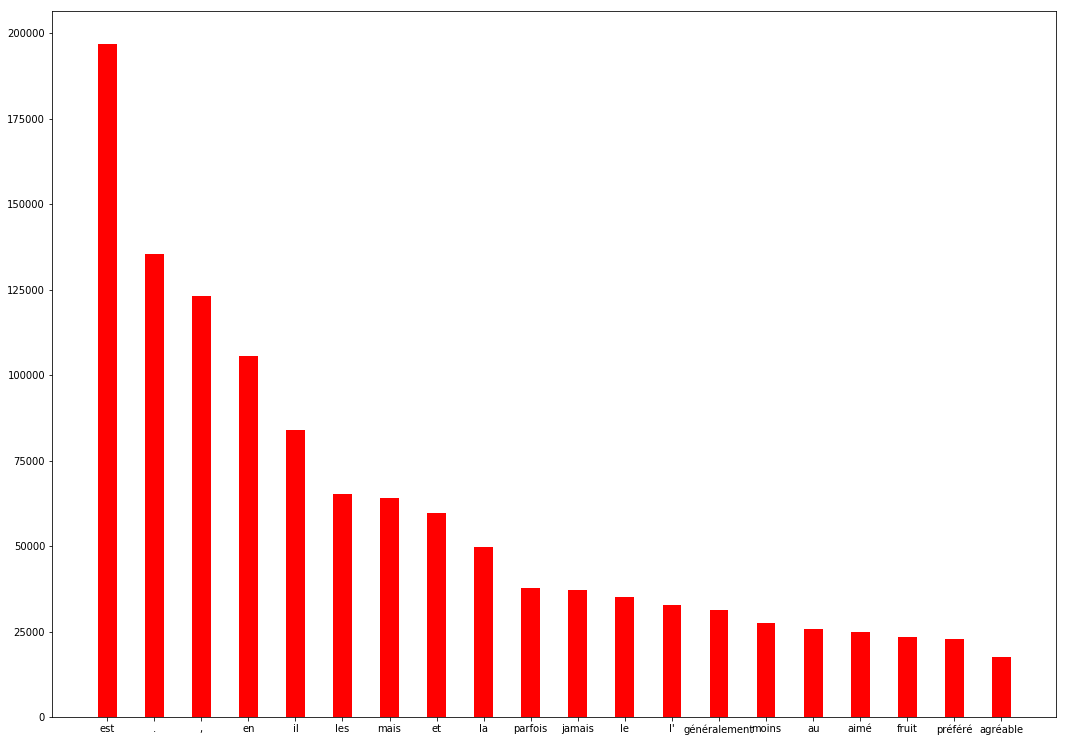

In [10]:
fig = plt.figure(1, figsize=(18,13))  
plt.bar(*zip(*french_words_counter.most_common(20)), width=0.4, color='r')

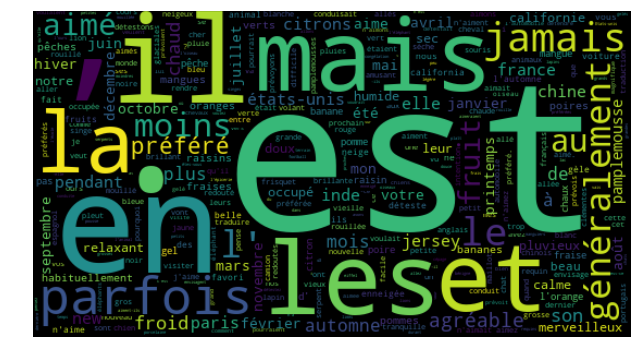

In [11]:
from wordcloud import WordCloud
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(french_words_counter)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h2>Data Preprocessing</h2>



</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>Tokenize the words into ids</h3>



</body>
</html>

In [12]:
def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    # TODO: Implement
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    return tokenizer.texts_to_sequences(x), tokenizer

<!DOCTYPE html>
<html>
<body>

<h3>Tokenize Example: Tokenize the first 3 English sentences</h3>



</body>
</html>

In [13]:
# Tokenize Example output
text_sentences = english_sentences[:3]
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'is': 1, 'usually': 2, 'during': 3, 'and': 4, 'it': 5, 'in': 6, 'quiet': 7, 'new': 8, 'jersey': 9, 'sometimes': 10, 'autumn': 11, 'snowy': 12, 'april': 13, 'the': 14, 'united': 15, 'states': 16, 'chilly': 17, 'july': 18, 'freezing': 19, 'november': 20, 'california': 21, 'march': 22, 'hot': 23, 'june': 24}

Sequence 1 in x
  Input:  new jersey is sometimes quiet during autumn , and it is snowy in april .
  Output: [8, 9, 1, 10, 7, 3, 11, 4, 5, 1, 12, 6, 13]
Sequence 2 in x
  Input:  the united states is usually chilly during july , and it is usually freezing in november .
  Output: [14, 15, 16, 1, 2, 17, 3, 18, 4, 5, 1, 2, 19, 6, 20]
Sequence 3 in x
  Input:  california is usually quiet during march , and it is usually hot in june .
  Output: [21, 1, 2, 7, 3, 22, 4, 5, 1, 2, 23, 6, 24]


<!DOCTYPE html>
<html>
<body>


<h4>Remark:</h4>
<p>- We don't token Punctuations and Spaces  </p>





</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>Add padding to make all the sequences the same length</h3>



</body>
</html>

In [14]:
# Padding
def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    return pad_sequences(x, maxlen=length, padding='post')

<!DOCTYPE html>
<html>
<body>


<h4>Remark:</h4>
<p>- We use the length of the longest sequence (sentence) for padding </p>





</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>Padding Example: Let's do Padding on the tokenized first 3 English sentences</h3>



</body>
</html>

In [15]:
# Pad Tokenized EXAMPLE output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [ 8  9  1 10  7  3 11  4  5  1 12  6 13]
  Output: [ 8  9  1 10  7  3 11  4  5  1 12  6 13  0  0]
Sequence 2 in x
  Input:  [14 15 16  1  2 17  3 18  4  5  1  2 19  6 20]
  Output: [14 15 16  1  2 17  3 18  4  5  1  2 19  6 20]
Sequence 3 in x
  Input:  [21  1  2  7  3 22  4  5  1  2 23  6 24]
  Output: [21  1  2  7  3 22  4  5  1  2 23  6 24  0  0]


<!DOCTYPE html>
<html>
<body>

<h3>Preprocessing Function</h3>



</body>
</html>

In [16]:
def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk


<!DOCTYPE html>
<html>
<body>

<h3>Preprocessing Implementation & Analysis</h3>



</body>
</html>

In [17]:
preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    preprocess(english_sentences, french_sentences)
    
max_english_sequence_length = preproc_english_sentences.shape[1]
max_french_sequence_length = preproc_french_sentences.shape[1]
english_vocab_size = len(english_tokenizer.word_index)
french_vocab_size = len(french_tokenizer.word_index)+1

print('Data Preprocessed')
print("Max English sentence length:", max_english_sequence_length)
print("Max French sentence length:", max_french_sequence_length)
print("English vocabulary size:", english_vocab_size)
print("French vocabulary size:", french_vocab_size)

Data Preprocessed
Max English sentence length: 15
Max French sentence length: 21
English vocabulary size: 199
French vocabulary size: 345


<BarContainer object of 2 artists>

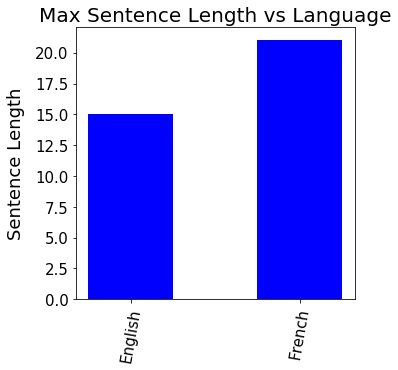

In [18]:
x =['English','French']
y = [15, 21 ]

fig = plt.figure(1, figsize=(5,5))     
plt.ylabel("Sentence Length", fontsize = 18, labelpad = 10)
plt.xticks(rotation=80, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Max Sentence Length vs Language",fontsize = 20)
plt.bar(x,y, 0.5, color='b')

<!DOCTYPE html>
<html>
<body>


<h4>Remark:</h4>
<p>- Max_English_sentence_length is less than Max_French_sentence_length </p>

<h4>Decision:</h4>
<p>- we have to pad English sentences to  Max_French_sentence_length </p>





</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>Functions to Convert Tokens to Text</h3>



</body>
</html>

In [19]:
# used to convert predicted token (by model) to word text
# get the index of the node that has the high probability (softmax) to fetch the token text
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')


#----------------------------------------------------------------
# Jasser Code
# used to convert given token (by user) to word text
def token_to_text(listofLists, tokenizer):

    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'
    
    # Flaten
    flat_list = [item for sublist in listofLists for item in sublist]

    return ' '.join([index_to_words[prediction] for prediction in flat_list])

print('`token_to_text` function loaded.')

`logits_to_text` function loaded.
`token_to_text` function loaded.


<!DOCTYPE html>
<html>
<body>

<h3>Functions to Convert Text to Tokens</h3>



</body>
</html>

In [20]:
# Jasser Code 
def text_to_token_Preprocessing(text, english_tokenizer, modelNumber):
    strList = [text]
    text_tokenized, text_tokenizer = tokenize(strList)
    # we have only to get the keys 
    wordList = list(text_tokenizer.word_index.keys()) 
    tokenList =[]
    for word in wordList:
        tokenList.append(english_tokenizer.word_index.get(word,0)) 
        #if word doesn't exist in vocabulary, we treat it as <pad>
    
    # if input text length doesn't fit our input shape
    max_french_sequence_length = 21
    if len(tokenList) > max_french_sequence_length:
        tokenList = tokenList[:max_french_sequence_length]
            
    tokens = [tokenList]
    if modelNumber == 1 or modelNumber == 3:
        tokens = pad(tokens, max_french_sequence_length) 
        tokens = tokens.reshape((-1, max_french_sequence_length, 1))
    else:
        tokens = pad(tokens, max_french_sequence_length) 
        tokens = tokens.reshape((-1, max_french_sequence_length))
    

    return tokens

print('`text_to_token_Preprocessing` function loaded.')


`text_to_token_Preprocessing` function loaded.


<!DOCTYPE html>
<html>
<body>

<h3>Data Splitting: 80% Training Data + 20% Testing Data</h3>



</body>
</html>

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preproc_english_sentences, preproc_french_sentences, test_size=0.2)

<!DOCTYPE html>
<html>
<body>

<h2>RNN Model Architectures</h2>

</body>
</html>

## Model 1: RNN (many to many)
![RNN](./rnn.png)
A basic RNN model to translate English to French.

<!DOCTYPE html>
<html>
<body>

<h3>Function to built a simple keras RNN model</h3>



</body>
</html>

In [22]:
def simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # Hyperparameters
    learning_rate = 0.005
    
    # TODO: Build the layers
    model = Sequential()
    model.add(GRU(256, input_shape=input_shape[1:], return_sequences=True))
    model.add(TimeDistributed(Dense(1024, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax'))) 

    # Compile model
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

In [23]:
# Reshaping the input to work with a basic RNN

#Max French sentence length > Max English sentence length
x_train = pad(X_train, max_french_sequence_length) 
x_train = x_train.reshape((-1, y_train.shape[-2], 1))

<!DOCTYPE html>
<html>
<body>

<h3>Architecture of Model 1</h3>



</body>
</html>

In [24]:
# Train the neural network
simple_rnn_model = simple_model(
    x_train.shape,
    max_french_sequence_length,
    english_vocab_size,
    french_vocab_size)

print(simple_rnn_model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 21, 256)           198144    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 21, 1024)          263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 1024)          0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 21, 345)           353625    
Total params: 814,937
Trainable params: 814,937
Non-trainable params: 0
_________________________________________________________________
None


<!DOCTYPE html>
<html>
<body>

<h3>Training</h3>



</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h3>The validation set is 20% of the training set</h3>



</body>
</html>

In [25]:
history1 = simple_rnn_model.fit(x_train, y_train, batch_size=1024, epochs=10, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 88230 samples, validate on 22058 samples
Epoch 1/10
88230/88230 [==============================] - 135s 2ms/step - loss: 2.0770 - acc: 0.5229 - val_loss: 1.3617 - val_acc: 0.6166
Epoch 2/10
88230/88230 [==============================] - 140s 2ms/step - loss: 1.2846 - acc: 0.6330 - val_loss: 1.1355 - val_acc: 0.6738
Epoch 3/10
88230/88230 [==============================] - 141s 2ms/step - loss: 1.1262 - acc: 0.6645 - val_loss: 1.0269 - val_acc: 0.6881
Epoch 4/10
88230/88230 [==============================] - 142s 2ms/step - loss: 1.0403 - acc: 0.6789 - val_loss: 0.9832 - val_acc: 0.6904
Epoch 5/10
88230/88230 [==============================] - 143s 2ms/step - loss: 0.9813 - acc: 0.6886 - val_loss: 0.8899 - val_acc: 0.7092
Epoch 6/10
88230/88230 [==============================] - 143s 2ms/step - loss: 0.9422 - acc: 0.6953 - val_loss: 0.8670 - val_acc: 0.7143
Epoch 7/10
88230/88230 [==============================] - 141s 2ms/step - 

<!DOCTYPE html>
<html>
<body>

<h3>Prediction Example</h3>



</body>
</html>

In [26]:
# Print prediction(s)
print("Prediction:")
print(logits_to_text(simple_rnn_model.predict(x_train[:1])[0], french_tokenizer))

print("\nCorrect Translation:")
print(token_to_text(y_train[:1][0], french_tokenizer))

print("\nOriginal text:")
print(token_to_text(x_train[:1][0], english_tokenizer))

Prediction:
la pêche est votre fruit préféré moins mais la banane est son moins préféré <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Correct Translation:
la poire est votre fruit préféré moins mais la chaux est son moins préféré <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Original text:
the pear is your least favorite fruit but the lime is his least favorite <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


In [27]:
# testing 
testing_input = text_to_token_Preprocessing("he was driving a good truck ", english_tokenizer, 1)
print(logits_to_text(simple_rnn_model.predict(testing_input)[0], french_tokenizer))

il conduisait un camion <PAD> le <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


<!DOCTYPE html>
<html>
<body>

<h3>Learning Curve</h3>

</body>
</html>

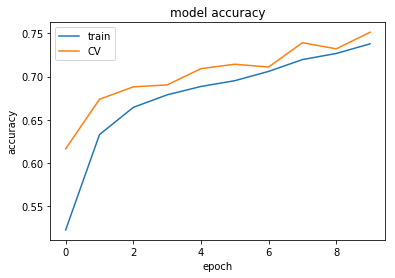

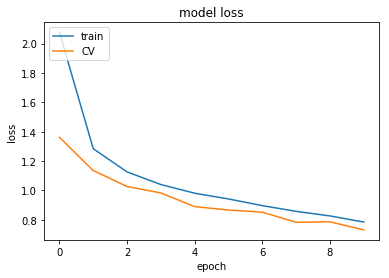

In [28]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h3>Evaluation on Testing set</h3>

</body>
</html>

In [29]:
# Preprocessing on test 
x_test = pad(X_test, max_french_sequence_length) 
x_test = x_test.reshape((-1, y_train.shape[-2], 1))


In [30]:
#Evaluation on Testing set 
score = simple_rnn_model.evaluate(x_test, y_test, verbose=0)

print("Accuracy:")
print(score[1])

Accuracy:
0.7520693990791064


## Model 2: RNN (many to many with Embedding)
Word embeddings : a better representation of a word. An embedding is a vector representation of the word that is close to similar words in n-dimensional space.

![RNN](./embedding.png)



<!DOCTYPE html>
<html>
<body>

<h3>Function to built a keras RNN model with Embedding</h3>



</body>
</html>

In [31]:
def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement

    # Hyperparameters
    learning_rate = 0.005
    
    # TODO: Build the layers
    model = Sequential()
    model.add(Embedding(english_vocab_size, 256, input_length=input_shape[1], input_shape=input_shape[1:]))
    model.add(GRU(256, return_sequences=True))    
    model.add(TimeDistributed(Dense(1024, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(french_vocab_size+1, activation='softmax'))) 

    # Compile model
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model


In [32]:
# TODO: Reshape the input
x_train = pad(X_train, preproc_french_sentences.shape[1])
x_train = x_train.reshape((-1, y_train.shape[-2]))


<!DOCTYPE html>
<html>
<body>

<h3>Architecture of Model 2</h3>



</body>
</html>

In [33]:
# TODO: Train the neural network
embed_rnn_model = embed_model(
    x_train.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

embed_rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21, 256)           51200     
_________________________________________________________________
gru_2 (GRU)                  (None, 21, 256)           393984    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 21, 1024)          263168    
_________________________________________________________________
dropout_2 (Dropout)          (None, 21, 1024)          0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 21, 346)           354650    
Total params: 1,063,002
Trainable params: 1,063,002
Non-trainable params: 0
_________________________________________________________________


<!DOCTYPE html>
<html>
<body>

<h3>Training</h3>



</body>
</html>



In [34]:
history2 = embed_rnn_model.fit(x_train, y_train, batch_size=1024, epochs=10, validation_split=0.2)

Train on 88230 samples, validate on 22058 samples
Epoch 1/10
88230/88230 [==============================] - 155s 2ms/step - loss: 1.5398 - acc: 0.6470 - val_loss: 0.5534 - val_acc: 0.8249
Epoch 2/10
88230/88230 [==============================] - 167s 2ms/step - loss: 0.4598 - acc: 0.8516 - val_loss: 0.3317 - val_acc: 0.8901
Epoch 3/10
88230/88230 [==============================] - 163s 2ms/step - loss: 0.3174 - acc: 0.8955 - val_loss: 0.2694 - val_acc: 0.9089
Epoch 4/10
88230/88230 [==============================] - 159s 2ms/step - loss: 0.2615 - acc: 0.9125 - val_loss: 0.2335 - val_acc: 0.9200
Epoch 5/10
88230/88230 [==============================] - 156s 2ms/step - loss: 0.2330 - acc: 0.9208 - val_loss: 0.2122 - val_acc: 0.9264
Epoch 6/10
88230/88230 [==============================] - 155s 2ms/step - loss: 0.2166 - acc: 0.9256 - val_loss: 0.2025 - val_acc: 0.9300
Epoch 7/10
88230/88230 [==============================] - 155s 2ms/step - loss: 0.2077 - acc: 0.9281 - val_loss: 0.1970 - 

<!DOCTYPE html>
<html>
<body>

<h3>Prediction Example</h3>



</body>
</html>

In [35]:
# Print prediction(s)
print("Prediction:")
print(logits_to_text(embed_rnn_model.predict(x_train[:1])[0], french_tokenizer))

print("\nCorrect Translation:")
print(token_to_text(y_train[:1][0], french_tokenizer))

print("\nOriginal text:")
print(token_to_text(x_train[:1], english_tokenizer))

Prediction:
les poire est votre fruit préféré moins mais la chaux est son moins préféré <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Correct Translation:
la poire est votre fruit préféré moins mais la chaux est son moins préféré <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Original text:
the pear is your least favorite fruit but the lime is his least favorite <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


<!DOCTYPE html>
<html>
<body>

<h3>Learning Curve</h3>

</body>
</html>

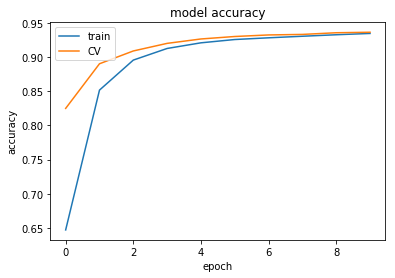

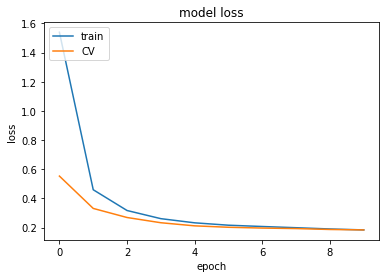

In [36]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h3>Evaluation on Testing set</h3>

</body>
</html>

In [37]:
# Preprocessing on test 
x_test = pad(X_test, max_french_sequence_length) 
x_test = x_test.reshape((-1, y_train.shape[-2]))

In [38]:
#Evaluation on Testing set 
score = embed_rnn_model.evaluate(x_test, y_test, verbose=0)

print("Accuracy:")
print(score[1])

Accuracy:
0.935811948870063


## Model 3:  RNN (many to many Bidirectional)
Bidirectional recurrent neural networks are able to see the future data.

![RNN](./bidirectional.png)


<!DOCTYPE html>
<html>
<body>

<h3>Function to built a keras RNN Bidirectional model </h3>



</body>
</html>

In [47]:
def bd_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a bidirectional RNN model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement

    # Hyperparameters
    learning_rate = 0.003
    
    # TODO: Build the layers
    model = Sequential()
    model.add(Bidirectional(GRU(128, return_sequences=True), input_shape=input_shape[1:]))
    model.add(TimeDistributed(Dense(1024, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax'))) 

    # Compile model
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model


In [48]:
# TODO: Reshape the input
x_train = pad(X_train, preproc_french_sentences.shape[1])
x_train = x_train.reshape((-1, y_train.shape[-2],1))

<!DOCTYPE html>
<html>
<body>

<h3>Architecture of Model 3</h3>



</body>
</html>

In [49]:
# TODO: Train and Print prediction(s)
bd_rnn_model = bd_model(
    x_train.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

bd_rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 21, 256)           99840     
_________________________________________________________________
time_distributed_9 (TimeDist (None, 21, 1024)          263168    
_________________________________________________________________
dropout_5 (Dropout)          (None, 21, 1024)          0         
_________________________________________________________________
time_distributed_10 (TimeDis (None, 21, 345)           353625    
Total params: 716,633
Trainable params: 716,633
Non-trainable params: 0
_________________________________________________________________


<!DOCTYPE html>
<html>
<body>

<h3>Training</h3>



</body>
</html>


In [50]:
history3 = bd_rnn_model.fit(x_train, y_train, batch_size=1024, epochs=10, validation_split=0.2)

Train on 88230 samples, validate on 22058 samples
Epoch 1/10
88230/88230 [==============================] - 121s 1ms/step - loss: 1.9488 - acc: 0.5576 - val_loss: 1.3208 - val_acc: 0.6335
Epoch 2/10
88230/88230 [==============================] - 119s 1ms/step - loss: 1.2632 - acc: 0.6392 - val_loss: 1.1545 - val_acc: 0.6581
Epoch 3/10
88230/88230 [==============================] - 119s 1ms/step - loss: 1.1352 - acc: 0.6616 - val_loss: 1.0528 - val_acc: 0.6775
Epoch 4/10
88230/88230 [==============================] - 117s 1ms/step - loss: 1.0552 - acc: 0.6744 - val_loss: 0.9738 - val_acc: 0.6910
Epoch 5/10
88230/88230 [==============================] - 117s 1ms/step - loss: 0.9906 - acc: 0.6853 - val_loss: 0.9236 - val_acc: 0.6990
Epoch 6/10
88230/88230 [==============================] - 116s 1ms/step - loss: 0.9442 - acc: 0.6935 - val_loss: 0.8826 - val_acc: 0.7035
Epoch 7/10
88230/88230 [==============================] - 119s 1ms/step - loss: 0.9033 - acc: 0.7006 - val_loss: 0.8383 - 

<!DOCTYPE html>
<html>
<body>

<h3>Prediction Example</h3>



</body>
</html>

In [52]:
# Print prediction(s)
print("Prediction:")
print(logits_to_text(bd_rnn_model.predict(x_train[:1])[0], french_tokenizer))

print("\nCorrect Translation:")
print(token_to_text(y_train[:1][0], french_tokenizer))

print("\nOriginal text:")
print(token_to_text(x_train[:1][0], english_tokenizer))

Prediction:
la poire est votre fruit préféré moins mais la est est son moins moins <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Correct Translation:
la poire est votre fruit préféré moins mais la chaux est son moins préféré <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Original text:
the pear is your least favorite fruit but the lime is his least favorite <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


<!DOCTYPE html>
<html>
<body>

<h3>Learning Curve</h3>

</body>
</html>

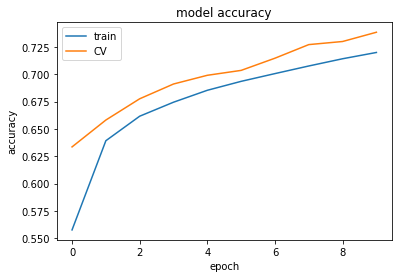

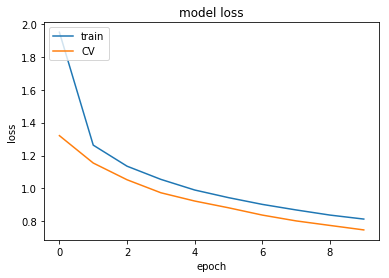

In [53]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h3>Evaluation on Testing set</h3>

</body>
</html>

In [54]:
# Preprocessing on test 
x_test = pad(X_test, max_french_sequence_length) 
x_test = x_test.reshape((-1, y_train.shape[-2],1))

In [55]:
#Evaluation on Testing set 
score = bd_rnn_model.evaluate(x_test, y_test, verbose=0)

print("Accuracy:")
print(score[1])

Accuracy:
0.7386521999531513


## Model 4:  RNN (many to many Bidirectional with Embedding)


![RNN](./bidirectionalemb1.png)
![RNN](./bidirectionalemb2.png)


<!DOCTYPE html>
<html>
<body>

<h3>Function to built a keras RNN Bidirectional with Embedding model </h3>



</body>
</html>

In [56]:
def bd_emb_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a bidirectional RNN model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement

    # Hyperparameters
    learning_rate = 0.003
    
    # TODO: Build the layers
    model = Sequential()
    model.add(Embedding(english_vocab_size, 128, input_length=input_shape[1], input_shape=input_shape[1:]))
    model.add(Bidirectional(GRU(128, return_sequences=True), input_shape=input_shape[1:]))
    model.add(TimeDistributed(Dense(1024, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax'))) 

    # Compile model
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

In [57]:
# TODO: Reshape the input
x_train = pad(X_train, preproc_french_sentences.shape[1])
x_train = x_train.reshape((-1, y_train.shape[-2]))

<!DOCTYPE html>
<html>
<body>

<h3>Architecture of Model 4</h3>



</body>
</html>

In [58]:
# TODO: Train and Print prediction(s)
bd_emb_rnn_model = bd_emb_model(
    x_train.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

bd_emb_rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 21, 128)           25600     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 21, 256)           197376    
_________________________________________________________________
time_distributed_11 (TimeDis (None, 21, 1024)          263168    
_________________________________________________________________
dropout_6 (Dropout)          (None, 21, 1024)          0         
_________________________________________________________________
time_distributed_12 (TimeDis (None, 21, 345)           353625    
Total params: 839,769
Trainable params: 839,769
Non-trainable params: 0
_________________________________________________________________


<!DOCTYPE html>
<html>
<body>

<h3>Training</h3>



</body>
</html>

In [59]:
history4 = bd_emb_rnn_model.fit(x_train, y_train, batch_size=1024, epochs=10, validation_split=0.2)

Train on 88230 samples, validate on 22058 samples
Epoch 1/10
88230/88230 [==============================] - 135s 2ms/step - loss: 1.9589 - acc: 0.5833 - val_loss: 0.8549 - val_acc: 0.7657
Epoch 2/10
88230/88230 [==============================] - 136s 2ms/step - loss: 0.6638 - acc: 0.8047 - val_loss: 0.4494 - val_acc: 0.8568
Epoch 3/10
88230/88230 [==============================] - 136s 2ms/step - loss: 0.4179 - acc: 0.8652 - val_loss: 0.3060 - val_acc: 0.9002
Epoch 4/10
88230/88230 [==============================] - 136s 2ms/step - loss: 0.3122 - acc: 0.8980 - val_loss: 0.2446 - val_acc: 0.9190
Epoch 5/10
88230/88230 [==============================] - 133s 2ms/step - loss: 0.2529 - acc: 0.9175 - val_loss: 0.1974 - val_acc: 0.9343
Epoch 6/10
88230/88230 [==============================] - 137s 2ms/step - loss: 0.2098 - acc: 0.9319 - val_loss: 0.1700 - val_acc: 0.9453
Epoch 7/10
88230/88230 [==============================] - 136s 2ms/step - loss: 0.1796 - acc: 0.9423 - val_loss: 0.1433 - 

<!DOCTYPE html>
<html>
<body>

<h3>Prediction Example</h3>



</body>
</html>

In [60]:
# Print prediction(s)
print("Prediction:")
print(logits_to_text(bd_emb_rnn_model.predict(x_train[:1])[0], french_tokenizer))

print("\nCorrect Translation:")
print(token_to_text(y_train[:1][0], french_tokenizer))

print("\nOriginal text:")
print(token_to_text(x_train[:1], english_tokenizer))

Prediction:
la poire est votre fruit préféré moins mais la chaux est son moins préféré <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Correct Translation:
la poire est votre fruit préféré moins mais la chaux est son moins préféré <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Original text:
the pear is your least favorite fruit but the lime is his least favorite <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


<!DOCTYPE html>
<html>
<body>

<h3>Learning Curve</h3>

</body>
</html>

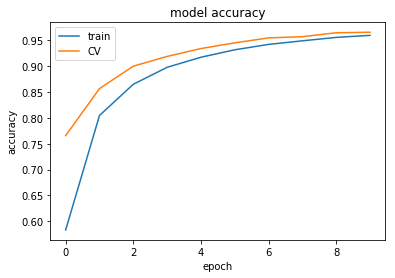

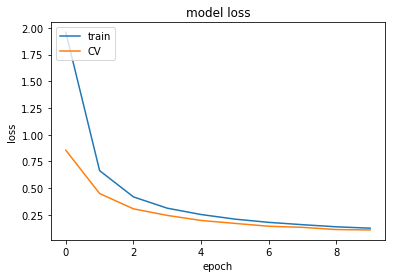

In [61]:
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h3>Evaluation on Testing set</h3>

</body>
</html>

In [62]:
# Preprocessing on test 
x_test = pad(X_test, max_french_sequence_length) 
x_test = x_test.reshape((-1, y_train.shape[-2]))

In [63]:
#Evaluation on Testing set 
score = bd_emb_rnn_model.evaluate(x_test, y_test, verbose=0)

print("Accuracy:")
print(score[1])

Accuracy:
0.9659380377780815


## Model 5: LSTM (many to many with Embedding)
LSTM is the most popular approach in Deep Learning for sequential models.

![LSTM](./lstm.jpg)


<!DOCTYPE html>
<html>
<body>

<h3>Functions</h3>

</body>
</html>

In [68]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r',  encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')


def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_len = len(word_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
    emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    emb_matrix = np.zeros((vocab_len, emb_dim))
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    return embedding_layer  






def lstm_model(input_shape, english_vocab_size, french_vocab_size):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement

    # Hyperparameters
    learning_rate = 0.005  
    # initializer the shape of the input for the Encoder/Decoder
    sentence_indices = Input((input_shape,),dtype='int32')
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)  
    # Propagate sentence_indices through your embedding layer, you get back the embeddings
    #embeddings = Embedding(english_vocab_size, 256, input_shape=input_shape[1:])(sentence)
    embeddings = embedding_layer(sentence_indices) 
    #out_input, h, c = LSTM(256, return_state=True)(embeddings)
    #out, _, _ = LSTM(256, return_state=True, return_sequences=True)(out_input, initial_state=[h, c])
    out,h,c = LSTM(256, return_state=True, return_sequences=True)(embeddings)
    out = Dropout(0.5)(out)
    out,_,_ = LSTM(256, return_state=True, return_sequences=True)(out,initial_state=[h, c])
    out = Dropout(0.5)(out)
    out = TimeDistributed(Dense(1024, activation='relu'))(out)
    out = Dropout(0.5)(out)
    outputs = TimeDistributed(Dense(french_vocab_size+1, activation='softmax'))(out)
    # create the Keras model
    model = Model(inputs=sentence_indices, outputs=outputs)
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

<!DOCTYPE html>
<html>
<body>

<h3>Training</h3>

</body>
</html>

In [69]:
# TODO: Reshape the input
x_train = pad(X_train, preproc_french_sentences.shape[1])
x_train = x_train.reshape((-1, y_train.shape[-2]))

# TODO: Train the neural network
embed_lstm_model = lstm_model(
    x_train.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

embed_lstm_model.summary()

history5 = embed_lstm_model.fit(x_train, y_train, batch_size=1024, epochs=20, validation_split=0.2)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 21)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 21, 50)       20000050    input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 21, 256), (N 314368      embedding_3[0][0]                
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 21, 256), (N 525312      lstm_1[0][0]                     
                                                                 lstm_1[0][1]                     
          

<!DOCTYPE html>
<html>
<body>

<h3>Prediction Example</h3>



</body>
</html>

In [70]:
# Print prediction(s)

print("Prediction:")
print(logits_to_text(embed_lstm_model.predict(x_train[1:2])[0], french_tokenizer))

print("\nCorrect Translation:")
print(token_to_text(y_train[1:2][0], french_tokenizer))

print("\nOriginal text:")
print(token_to_text(x_train[1:2], english_tokenizer))


print("\nPrediction:")
print(logits_to_text(embed_lstm_model.predict(x_train[5:6])[0], french_tokenizer))

print("\nCorrect Translation:")
print(token_to_text(y_train[5:6][0], french_tokenizer))

print("\nOriginal text:")
print(token_to_text(x_train[5:6], english_tokenizer))

Prediction:
l' inde est parfois enneigée en automne mais il est chaud en août <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Correct Translation:
l' inde est parfois enneigée en automne mais il est chaud en août <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Original text:
india is sometimes snowy during autumn but it is hot in august <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Prediction:
les états unis est sec au mois de novembre et il est relaxant en juillet <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Correct Translation:
les états unis est sec au mois de novembre et il est relaxant en juillet <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Original text:
the united states is dry during november and it is relaxing in july <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


<!DOCTYPE html>
<html>
<body>

<h3>Learning Curve</h3>

</body>
</html>

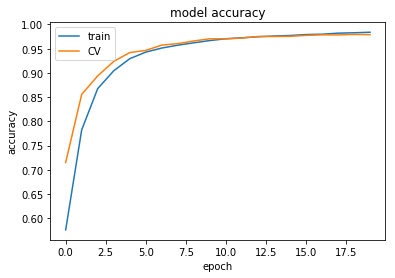

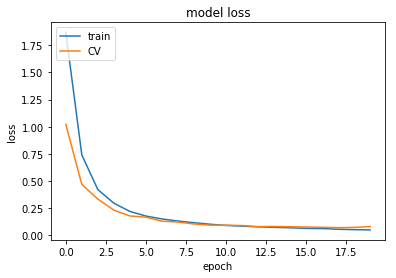

In [71]:
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h3>Evaluation on Testing set</h3>

</body>
</html>

In [72]:
# Preprocessing on test 
x_test = pad(X_test, max_french_sequence_length) 
x_test = x_test.reshape((-1, y_train.shape[-2]))

In [73]:
#Evaluation on Testing set 
score = embed_lstm_model.evaluate(x_test, y_test, verbose=0)

print("Accuracy:")
print(score[1])

Accuracy:
0.979538300513564


<!DOCTYPE html>
<html>
<body>

<h2>Pickle</h2>

</body>
</html>

In [78]:
import pickle
from keras.models import load_model


simple_rnn_model.save('model1.h5')  # creates a HDF5 file
embed_rnn_model.save('model2.h5')  # creates a HDF5 file
bd_rnn_model.save('model3.h5')  # creates a HDF5 file
bd_emb_rnn_model.save('model4.h5')  # creates a HDF5 file
embed_lstm_model.save('model5.h5')  # creates a HDF5 file


# To load Model 
# modelName = load_model('path')


    
with open('french_tokenizer.pickle2','wb') as f: 
    pickle.dump(french_tokenizer,f)
    
with open('english_tokenizer.pickle2','wb') as f: 
    pickle.dump(english_tokenizer,f)

C:\Users\jasse\Anaconda3\lib\site-packages\keras\engine\network.py:872: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_1/while/Exit_3:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'lstm_1/while/Exit_4:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


In [80]:
modelName = load_model('model5.h5')

print("Prediction:")
print(logits_to_text(modelName.predict(x_train[1:2])[0], french_tokenizer))

Prediction:
l' inde est parfois enneigée en automne mais il est chaud en août <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
